# Umap tutorial
# Resources
* https://umap-learn.readthedocs.io/en/latest/how_umap_works.html
* https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668
* https://towardsdatascience.com/how-to-program-umap-from-scratch-e6eff67f55fe
* https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/
* https://en.wikipedia.org/wiki/Connectivity_(graph_theory)
* https://en.wikipedia.org/wiki/Euclidean_distance
* https://en.wikipedia.org/wiki/Similarity_measure
* https://youtu.be/efR1C6CvhmE?t=929
* https://www.youtube.com/watch?v=x5zLaWT5KPs

In [130]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

%config InlineBackend.figure_format = 'retina'

In [2]:
expr = pd.read_csv('../../../data/CAFs.txt', sep='\t')

In [3]:
expr.head()

,1110020A21Rik,1110046J04Rik,1190002F15Rik,1500015A07Rik,1500015O10Rik,1700010K23Rik,1700012D01Rik,1810011H11Rik,2010204K13Rik,2310057J18Rik,...,Wif1,Wisp2,Yy2,Zfp2,Zfp36,Zfp454,Zfp652os,Zfp81,Zfp944,cluster
SS2_15_0048_A3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,107.526495,0.0,201.533078,0.0,0.0,0.0,0.000000,1
SS2_15_0048_A6,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,230.755035,0.000000,0.0,...,0.0,0.0,0.000000,0.0,175.071938,0.0,0.0,0.0,0.000000,1
SS2_15_0048_A5,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,375.177236,0.000000,0.0,...,0.0,0.0,0.000000,0.0,290.743379,0.0,0.0,0.0,0.000000,1
SS2_15_0048_A4,0.000000,0.0,0.0,0.0,891.488043,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,2
SS2_15_0048_A1,43.324338,0.0,0.0,0.0,0.000000,0.0,0.0,20.527119,65.766243,0.0,...,0.0,0.0,0.000000,0.0,768.997431,0.0,0.0,0.0,2.413509,1


In [4]:
X_train = expr.values[:,0:(expr.shape[1]-1)]
X_train = np.log(X_train + 1)
n = X_train.shape[0]
print("\nThis data set contains " + str(n) + " samples")
y_train = expr.values[:,expr.shape[1]-1]
print("\nDimensions of the  data set: ")
print(X_train.shape, y_train.shape)


This data set contains 716 samples

Dimensions of the  data set: 
(716, 557) (716,)


### 1. Compute Squared Pairwise Euclidean Distance Matrix
This will be used for the initial high-dimensional data set. A squared pairwise euclidean distance matrix is defined if we consider a matrix, `X`, and we treat the rows as vectors. We then want to compute the distance between each pair of vectors (rows). Mathematically, recall that euclidean distance between two $n$ dimensional vectors, $x$ and $y$, is defined as:

$$\text{Euclidean Distance} = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \dots + (x_n - y_n)^2} $$

We can define it in code as:




In [5]:
a = np.array([1,4,3,7])
b = np.array([5,1,6,7])

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

euclidean_distance(a, b)

5.830951894845301

Note that for this implementation we will be **squaring** the euclidean distances. Scikit learn provides the `euclidean_distances` func that we can use:

In [6]:
dist = np.square(euclidean_distances(X_train, X_train))

In [8]:
pd.DataFrame(dist).head(10)

,0,1,2,3,4,5,6,7,8,9,...,706,707,708,709,710,711,712,713,714,715
0,0.000000,914.950163,1477.468361,3036.911722,1433.734302,3246.777478,3196.617421,1683.945244,1493.029622,1474.278633,...,2408.598901,2230.479562,1306.721575,1316.501903,1563.305853,3093.630690,3400.304971,1058.566144,3328.595824,1478.189282
1,914.950163,0.000000,1307.392946,2960.415600,1513.019853,2988.217818,3180.651504,1756.129013,1493.183536,1319.675555,...,2391.512893,2205.686665,1386.919424,1373.626611,1648.813104,3313.505222,3330.411220,867.051976,3044.978347,1376.963129
2,1477.468361,1307.392946,0.000000,2678.344426,1404.936894,2920.436888,3022.925486,1860.169864,1394.458730,1293.047515,...,2352.261664,2781.247570,1741.879213,1863.113818,1859.956229,3627.469676,3197.032903,1400.747050,2986.189517,1308.086666
3,3036.911722,2960.415600,2678.344426,0.000000,2833.064000,1690.638732,1828.177877,2629.107910,2280.411129,3186.498756,...,1772.263126,2555.364064,2779.614583,2904.331176,2710.834583,3457.504665,1849.690465,2843.794892,1343.375827,2707.317181
4,1433.734302,1513.019853,1404.936894,2833.064000,0.000000,3102.982919,3290.133727,1619.241883,1139.226883,1465.024756,...,1917.132342,3058.591015,1727.042658,1978.056400,1888.497975,3586.046188,2996.018197,1572.172421,3057.076635,1110.071095
5,3246.777478,2988.217818,2920.436888,1690.638732,3102.982919,0.000000,1721.318407,2908.436374,2593.853227,3625.574133,...,1987.955115,2729.918692,2821.826410,3055.380905,2783.736377,3625.620604,2390.711559,2837.078426,1659.823876,2936.285429
6,3196.617421,3180.651504,3022.925486,1828.177877,3290.133727,1721.318407,0.000000,2958.050519,2713.763917,3884.706279,...,2280.619431,2233.510983,3022.561047,2886.010875,3081.067131,3986.961621,2229.701920,2950.435268,1465.107868,3342.723701
7,1683.945244,1756.129013,1860.169864,2629.107910,1619.241883,2908.436374,2958.050519,0.000000,1188.802056,2052.976525,...,2051.320959,2684.681316,1712.537101,1739.884240,1949.076892,3432.711108,3054.763244,1493.283819,2780.799018,1533.812010
8,1493.029622,1493.183536,1394.458730,2280.411129,1139.226883,2593.853227,2713.763917,1188.802056,0.000000,1728.192816,...,1521.970032,2496.882497,1240.590927,1612.859382,1528.356998,3428.893683,2613.221643,1349.517334,2465.900252,1087.625471
9,1474.278633,1319.675555,1293.047515,3186.498756,1465.024756,3625.574133,3884.706279,2052.976525,1728.192816,0.000000,...,2651.518432,3068.880567,1745.427248,2036.572847,1767.575023,3810.853003,3577.300923,1436.280819,3548.084912,1401.492479


We can check to make sure the first entry is calculated as we expected:

In [9]:
a = X_train[0]
b = X_train[1]

np.sqrt(np.sum((a - b)**2)) **2

914.9501631139505

And we do in fact end up with the correct distance of `914.95`. Another way to calculate this would be:

In [10]:
np.linalg.norm(a-b)**2

914.9501631139502

While we are here we will define the **local connectivity paramter**, $\rho$. In order to define $\rho$, we must discuss the **high dimensional probability space**. This probability space is a way of discussing the similarity of points in the high dimensional space. 

### $t$-SNE aside
Recall from $t-SNE$ that we convert high-dimensional euclidean distances between data points into conditional probabilities that represent **similarities** (for more detail see [here](https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/)). The similarity of data point (a row) $x_i$ to datapoint $x_j$ is the conditional probability, $p(x_j \mid x_i)$. This can be interpreted as:

> The probability that $x_i$ would pick $x_j$ as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian Centered at $x_i$.

This probability for a given $x_i$ and $x_j$ is defined as:

$$
p(x_j \mid x_i) = 
\frac{exp \big(\frac{- || x_i - x_j ||^2}{2\sigma_i^2} \big)}
{\sum_{k \neq i} exp \big(\frac{- || x_i - x_k ||^2}{2\sigma_i^2} \big)}
$$

Where the two vertical bars notation is in reference to euclidean distance. For nearby points, the conditional probability of being a neighbor is relatively high, whereas for widely separated points, the conditional probaiblity will be almost infinitesimal. 

It is important to remember that:
> The conditional probability is the the probability that $x_i$ would pick $x_j$ to be it's neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at $x_i$. 

In other words, **we can think of $p(x_j \mid x_i)$ as the probability that $x_j$ is a neighbor of $x_i$**. 

### Back to Umap and $\rho$
With that said, Umap also defines a conditional probability that $x_j$ is a neighbor of $x_i$:

$$p(x_j \mid x_i) = exp\big( - \frac{d(x_i, x_j) - \rho_i}{\sigma_i} \big)$$

Where we can visualize $p(x_j \mid x_i)$ as a single *row* of probabilities corresponding to the probability that a given point (row), $x_i$,  is neighbors with each point $j$ (column) in the set of total points.

What $\rho$ represents is the distance from each $i$th data point to its first nearest neighbor (the closest data point to $x_i$). This ensures **locally connectivity of the manifold**. In other words, this gives a **locally adaptive exponential kernel** for each data point, so the **distance metric varies from point to point**.

Let's take a minute to talk about what this means exactly. First we can dig into this idea of **local connectivity**.

#### Local Connectivity
For a nice intro to homology and it's use dealing with connectivity, check out this great [post](https://towardsdatascience.com/persistent-homology-with-examples-1974d4b9c3d0). From the post, we see the section on **0d Persistent Homology** note:

> 0d persistent homology in Euclidean space can best be explained as growing balls simultaneously around each point. The key focus of 0d persistent homology here is _connected components_— as the balls around the points expand, 0d persistent homology notes when the balls touch.

Visually, the above statement corresponds to:

<img src="https://intuitive-ml-images.s3-us-west-1.amazonaws.com/machine_learning/unsupervised/umap/0d_persistent_homology.gif" width="700">

With this idea in mind, let's think about what this means exactly in the context of our problem. We described $\rho$ as providing assurance of _local connectivity_. Look a the visual below. Let's say the the data point of interest, $x_i$, is the point colored in red, and the closest points to it are the green points (any other point not visualized is further away from the red point than those in green): 

<img src="https://intuitive-ml-images.s3-us-west-1.amazonaws.com/machine_learning/unsupervised/umap/local_connectivity.png" width="600">

We want to ensure that points aren't just left entirely on their own, so by centering based on the nearest neighbor, we guarantee that $x_i$ will be connected. For instance, imagine we _didn't_ use $\rho$ for a moment; in other words, our conditional probability would be:

$$p(x_j \mid x_i) = exp\big( - \frac{d(x_i, x_j)}{\sigma_i} \big)$$

Say that our 6 green points we the following distance away from $x_i$ (letting $\sigma_i = 1$):

|point|distance|$p(x_j \mid x_i) $|
|---|---|---|
|1|100|$3.72^{-44}$|
|2|114|$3.09^{-50}$|
|3|99|$1.01^{-43}$|
|4|95|$5.52^{-42}$|
|5|105|$2.5^{-46}$|
|6|103|$1.85^{-45}$|

We see that our probabilities of the red point being a neighbor of _any single green_ is incredibly small. And, because we know that the green points are closer to the red than any other point, these are the largest probabilities that we will see for this specific $x_i$ (red point). We can view this to mean that currently the red point is not **locally connected**; it is essentially on it's own with no neighbors. 

Now, let's think about what happens if we utilize $\rho$, subtracting the distance of the closest point to $x_i$ from all distance calculations (i.e. centering). The closest point to $x_i$ is $95$ away and our table becomes:

|point|distance|$p(x_j \mid x_i) $|
|---|---|---|
|1|5|$0.67$|
|2|19|$5.6^{-9}$|
|3|4|$0.018$|
|4|0|$1$|
|5|10|$4.54^{-5}$|
|6|8|$0.0003$|

We now see that our conditional probability is much more reasonable, with a value of $1$ for the nearest point to $x_i$! We have ensured that our red point will be connected, i.e. that it will _have a neighbor_ and not simply be left on it's own.


#### Locally Adaptive Exponential Kernel
Now we can dig into what is meant exactly by a **locally adaptive exponential kernel**. Looking back to our example involing the red point, what we were really doing was placing a **kernel function** on $x_i$, and then calculating value of the kernel function for the distance between $x_i$ and $x_j$. If our data lived in one dimension we could visualize this as:

<img src="https://intuitive-ml-images.s3-us-west-1.amazonaws.com/machine_learning/unsupervised/umap/kde_1.png" width="600">

Where in the image above we have a gaussian kernel. We are dealing with an **exponential kernel**, which takes in a distance between two points:

$$ \text{Exponential Kernel} \longrightarrow K \big( d(x_i, x_j) \big) = \overbrace{exp}^\text{kernel}\big( \overbrace{ -d(x_i, x_j) }^\text{non-adaptive input} \big)$$

Now, as we discussed earlier, this kernel is currently _the same_ for any single point. In other words, it does not change based on how close a point is to other points (it simply takes in a the distance between two points and yields a probability density, that is it). Is there a way that we could ensure that it did take into considering how close a point is to other points? Yes, via centering with $\rho$! By subtracting $\rho$ from the distance between $x_i$ and $x_j$ we have made our exponential kernel *locally adaptive*. 

$$p(x_j \mid x_i) = \overbrace{exp}^\text{kernel}\big( \overbrace{ - \frac{d(x_i, x_j) - \rho_i}{\sigma_i} }^\text{adaptive input}\big)$$

We can view this another way in saying that our **distance metric varies from point to point**. If we view the input to our exponential kernel as an abstract distance metric:

$$p(x_j \mid x_i)=  exp\big( \overbrace{ -d(x_i, x_j) }^\text{distance metric} \big)$$

We can simply say that we updated our *distance metric* to vary from point to point:

$$p(x_j \mid x_i)=  exp\big( \overbrace{  - \frac{d(x_i, x_j) - \rho_i}{\sigma_i}  }^\text{distance metric} \big)$$

With this all said, let's calculate $\rho$ for a single point. We will take the first row of our distance matrix, sort it, and grab the 1st value (that is not $0$, $0$ corresponds to a points distance to itself):

In [18]:
np.sort(dist[0])[1]

805.2464562222542

And now we can calcualte $\rho$ for all points (remember that $\rho$ is simply an array where each value is the distance of $x_i$ to the nearest point, where $i$ is the point's row index):

In [19]:
rho = [sorted(dist[i])[1] for i in range(dist.shape[0])]

Let's see if our nearest neighbor distance does indeed match up:

In [20]:
rho[0]

805.2464562222542

And $\rho$ appears to have been calculated successfully. Note the key differences between the conditional probability umap creates and that of $t$-SNE:
* Umap does not normalize the conditional probability. 

### Compute the high dimensional space probabilities
We are now are the point where we can compute the high dimensional space probability matrix. Remember, that probability is defined via:

$$p(x_j \mid x_i) = exp\big( - \frac{d(x_i, x_j) - \rho_i}{\sigma_i} \big)$$

In [21]:
def prob_high_dim(sigma, dist_row):
    """
    For each row of the euclidean distance matrix (dist_row, an index/scalar) compute 
    probability in high dimensions (1D array).
    """
    d = dist[dist_row] - rho[dist_row]
    d[d < 0] = 0
    
    return np.exp(-d / sigma)

Now in the case of $t$-SNe there was a term known as **perplexity** that was meant to be a *constraint* to aid in determining the optimal $\sigma$ for each $x_i$ (row). We no longer use the perplexity term, but rather the **number of nearest neighbors**, $k$. It is defined as:

$$k = 2^{\sum_i p(x_j \mid x_i)}$$

The important thing to keep in mind here is that $k$ is used to help in finding the $\sigma_i$ for each specific row (just like perplexity was in $t$-SNE). We can define `k` in code as:

In [67]:
def k(high_dimensional_probability_row):
    """
    Compute n_neighbor = k (scalar) for each 1D array of high-dimensional probability.
    """
    return np.power(2, np.sum(high_dimensional_probability_row))

To make this crystal clear, let's write our definitions of $k$ and $p(x_j \mid x_i)$ together:

$$k = 2^{\sum_i p{(x_j, x_i)}} = 2^{\sum_i p(x_j \mid x_i)}$$

$$p(x_j \mid x_i) = exp\big( - \frac{d(x_i, x_j) - \rho_i}{\sigma_i} \big)$$

We can swap in the value of $p(x_j \mid x_i)$ to the equation for $k$:

$$k = 2^{\sum_i  exp\big( - \frac{d(x_i, x_j) - \rho_i}{\sigma_i} \big)} $$

Where we now have a single equation and two unknowns, $k$ and $\sigma_i$. Part of the Umap algorithm is the *fixing* of $k$ (i.e. chosing it's value as a hyperparameter), leaving us with a way of calculating $\sigma_i$. It is still challenging to calculate $\sigma_i$ analytically, so we now have to use **binary search** in order to find $\sigma_i$ for each $i$th cell in the data set. Here, $i$ is corresponding to a specific row (or column) in our distance matrix (which again holds the distance from the $i$th cell to all other cells). 

For each $i$th cell, given the 1D array of high-dimensional probabilities, we can sum up the elements of the array and compute the number of nearest neighbors, $k$, according to our definition. With `k`, we now have a function that produces the number of nearest neighbors for value for each $\sigma_i$ for each $i$th cell. We can fix the number of nearest neighbors value and input this function into the binary search procedure in order to compute $\sigma_i$ for each $i$th cell. 

In [66]:
def sigma_binary_search(k_of_sigma, fixed_k):
    """
    Solve equation k_of_sigma = fixed_k
    with respect to sigma by the binary search algorithm
    """
    sigma_lower_limit = 0
    sigma_upper_limit = 1000
    
    for i in range(20):
        
        approx_sigma = (sigma_lower_limit + sigma_upper_limit) / 2
        
        if k_of_sigma(approx_sigma) < fixed_k:
            sigma_lower_limit = approx_sigma
        
        else:
            sigma_upper_limit = approx_sigma
            
        if np.abs(fixed_k - k_of_sigma(approx_sigma)) <= 1e-5:
            break
            
    return approx_sigma

Then, for every $x_i$ (i.e. row in our distance matrix), we determine the optimal $\sigma_i$, based on a fixed number of neighbors, which we set as `N_NEIGHBOR = 15`. 

In [83]:
N_NEIGHBOR = 15
prob = np.zeros((n,n))
sigma_array = []

rows_in_distance_matrix = np.arange(0, n, 1)

for dist_row in rows_in_distance_matrix:
    
    func = lambda sigma: k(prob_high_dim(sigma, dist_row))
    
    binary_search_result = sigma_binary_search(func, N_NEIGHBOR)
    
    prob[dist_row] = prob_high_dim(binary_search_result, dist_row)
    sigma_array.append(binary_search_result)
    
    if (dist_row + 1) % 100 == 0:
        print("Sigma binary search finished {0} of {1} cells".format(dist_row + 1, n))

print("\nMean sigma = " + str(np.mean(sigma_array)))

Sigma binary search finished 100 of 716 cells
Sigma binary search finished 200 of 716 cells
Sigma binary search finished 300 of 716 cells
Sigma binary search finished 400 of 716 cells
Sigma binary search finished 500 of 716 cells
Sigma binary search finished 600 of 716 cells
Sigma binary search finished 700 of 716 cells

Mean sigma = 63.51506110676174


In [65]:
k(prob_high_dim(26.45397186279297, 0))

15.000952667912062

In [88]:
def calculate_high_dimensional_probability_matrix_and_sigma(neighbors=15):
    """
    Determines sigma_i for each row of the high dimensional probability matrix,
    then calculates that matrix.
    """
    
    N_NEIGHBOR = neighbors
    high_dimensional_prob_matrix = np.zeros((n, n))
    sigma_array = []

    rows_in_distance_matrix = np.arange(0, n, 1)
    
    for dist_row in rows_in_distance_matrix:

        def k_of_sigma_func(sigma):
            high_dimensional_probability_row = prob_high_dim(sigma, dist_row)
            return k(high_dimensional_probability_row)
        
        sigma_i = sigma_binary_search(k_of_sigma_func, N_NEIGHBOR)
        
        high_dimensional_prob_matrix[dist_row] = prob_high_dim(sigma_i, dist_row)
        
        sigma_array.append(sigma_i)
        
        if (dist_row + 1) % 100 == 0:
            print(f'Sigma binary search finished {dist_row + 1} of {n} cells')    
        
    return (high_dimensional_prob_matrix, sigma_array)

In [84]:
high_dimensional_prob_matrix, sigma_array = calculate_high_dimensional_probability_matrix_and_sigma()

Sigma binary search finished 100 of 716 cells
Sigma binary search finished 200 of 716 cells
Sigma binary search finished 300 of 716 cells
Sigma binary search finished 400 of 716 cells
Sigma binary search finished 500 of 716 cells
Sigma binary search finished 600 of 716 cells
Sigma binary search finished 700 of 716 cells


In [94]:
print(
    'High dimensionality Probability Matrix Shape: ', high_dimensional_prob_matrix.shape, 
    'Length of sigma array', len(sigma_array)
)
print("\nMean sigma = " + str(np.mean(sigma_array)))

High dimensionality Probability Matrix Shape:  (716, 716) Length of sigma array 716

Mean sigma = 63.51506110676174


With that we have our full high dimensionality probability matrix, $p(x_i, x_j)$. There is only one thing left to do with this step, **symmetrize** this matrix.

### High Dimensional Probability Matrix Symmetry Condition
While $t$-SNE utilized the following symmetry condition:

$$p(x_i, x_j) = \frac{p(x_i \mid x_j) + p(x_j \mid x_i)}{2N}$$

Umap uses a slightly different condition:

$$p(x_i, x_j) = p(x_i \mid x_j) + p(x_j \mid x_i) - p(x_i \mid x_j)p(x_j \mid x_i)$$

However, for visualization purposes, [this blog post](https://towardsdatascience.com/how-to-program-umap-from-scratch-e6eff67f55fe) recommends the simple symmetry condition of:

$$p(x_i, x_j) = \frac{p(x_i \mid x_j) + p(x_j \mid x_i)}{2}$$

We can start by looking our current high dimensional matrix and see that it is indeed not symmetric:

In [100]:
pd.DataFrame(high_dimensional_prob_matrix).head()

,0,1,2,3,4,5,6,7,8,9,...,706,707,708,709,710,711,712,713,714,715
0,1.000000e+00,1.581233e-02,9.207516e-12,2.305594e-37,4.809766e-11,8.268367e-41,5.506767e-40,3.753310e-15,5.112973e-12,1.038743e-11,...,4.761958e-27,3.999155e-24,5.851808e-09,4.043213e-09,3.588803e-13,2.701646e-38,2.494371e-43,6.938319e-05,3.751536e-42,8.959982e-12
1,4.429691e-03,1.000000e+00,1.343680e-06,2.040198e-21,1.927262e-08,1.149311e-21,2.164482e-23,1.275187e-10,2.902450e-08,1.042768e-06,...,2.568241e-16,1.189834e-14,2.602411e-07,3.424050e-07,1.168460e-09,1.394372e-24,9.836118e-25,1.190583e-02,3.561265e-22,3.196169e-07
2,6.980207e-06,6.828541e-04,1.000000e+00,6.159456e-20,4.928703e-05,9.041467e-23,5.711819e-24,2.317191e-10,6.536763e-05,1.005121e-03,...,4.034758e-16,3.847923e-21,5.615183e-09,2.140462e-10,2.330569e-10,4.803474e-31,5.237532e-26,5.517827e-05,1.537128e-23,6.702072e-04
3,6.318796e-17,3.105510e-16,1.101436e-13,1.000000e+00,4.398936e-15,9.342854e-05,5.335473e-06,3.069309e-13,4.356520e-10,2.808141e-18,...,1.708532e-05,1.424491e-12,1.338172e-14,9.979686e-16,5.600923e-14,9.968243e-21,3.409624e-06,3.518391e-15,1.287114e-01,6.026369e-14
4,8.464655e-04,3.291219e-04,1.192937e-03,4.863684e-11,1.000000e+00,1.951219e-12,2.098550e-13,9.283787e-05,2.828124e-02,5.830436e-04,...,2.668892e-06,3.311358e-12,2.569949e-05,1.291480e-06,3.754012e-06,6.176750e-15,6.978800e-12,1.626596e-04,3.371647e-12,4.002775e-02


Why exactly is it not symmetric? Well, remember that Umap is glueing points together with locally varying metrics (via the paramter $\rho$). Specifically, take a look at the image below:

<img src="https://intuitive-ml-images.s3-us-west-1.amazonaws.com/machine_learning/unsupervised/umap/assymetric_high_dimensional_prob_matrix.png" width="800">

Above we see that we have three data points, $A$, $B$, and $C$. Umap will calculate the pairwise distance matrix between them, shown on the left. Notice that this **distance matrix** is *symmetric*; the distance from $A$ to $B$, is that of $B$ to $A$, which is equal to $5$, shaded green. 

However, the way that Umap calculates the probability matrix causes it to be *asymmetric*. Let's quickly walk through why that is, starting with the first row, $A$. When calculating the probability that matrix for row $A$ (see middle graph), it will have the form:

$$p(B \mid A) = exp\big( - \frac{d(A, B) - \text{distance to nearest neighbor}}{\sigma_A} \big)$$

And 

$$p(C \mid A) = exp\big( - \frac{d(A, C) - \text{distance to nearest neighbor}}{\sigma_A} \big)$$

Well, when taking the perspective of $A$, it's nearest neighbor is $B$. So, when calculating $p(B \mid A)$ we get:

$$p(B \mid A) = exp\big( - \frac{d(A, B) - d(A, B)}{\sigma_A} \big) = 1$$

And a slightly smaller value for $p(C \mid A)$. Now, the asymmetry comes into play when we now look at things from the perspective of $B$: 

$$p(A \mid B) = exp\big( - \frac{d(B, A) - \text{distance to nearest neighbor}}{\sigma_B} \big)$$

And 

$$p(C \mid B) = exp\big( - \frac{d(B, C) - \text{distance to nearest neighbor}}{\sigma_B} \big)$$

Now, $B$'s closest neighbor is *not* $A$, rather it is $C$. So, we localize the probability matrix for row $B$ based on it's distance to $C$:

$$p(B \mid C) = exp\big( - \frac{d(B, C) - d(B, C)}{\sigma_B} \big) = 1$$

Which means that when we then calculate the similarity/probability of $B$ to $A$, we get:

$$p(B \mid A) = exp\big( - \frac{d(B, A) - d(B, C)}{\sigma_B} \big) = 0.5$$

Hence, we see how our probability matrix will be asymmetric:

$$p(B \mid A) \neq p(A \mid B)$$

A brief note; we can think of Umap **glueing** points together based on this locally varying distance metric. For instance, when subtracting $\rho$ during our calculating of the probabilities for row $A$, we can visualize the following:

<img src="https://intuitive-ml-images.s3-us-west-1.amazonaws.com/machine_learning/unsupervised/umap/localizing_effect_of_rho.png" width="500">

By subtracting the distance to the nearest neighbor, we effectively glue $A$ and $B$ together, pull $C$ closer together as well. 

A final note, it is important to keep in mind that this distance matrix can be viewed as a **graph structure**, as shown above. When talking in terms of graph structures, we would say:

> It can happen that the weight/similarity of the edge between nodes $A$ and $B$ is not equal to the weight between nodes $B$ and $A$.

Okay, let's actually perform our symmetrization:

In [113]:
high_dimensional_prob_matrix_symmetrical = (
    high_dimensional_prob_matrix + np.transpose(high_dimensional_prob_matrix)
) / 2

pd.DataFrame(high_dimensional_prob_matrix_symmetrical).head()

,0,1,2,3,4,5,6,7,8,9,...,706,707,708,709,710,711,712,713,714,715
0,1.000000e+00,1.012101e-02,3.490108e-06,3.159398e-17,4.232328e-04,3.040458e-08,5.613541e-22,4.630437e-06,9.627900e-05,5.810733e-06,...,4.236950e-09,2.223008e-04,5.749115e-04,1.830557e-05,1.142001e-04,0.000041,9.757741e-15,5.863415e-04,4.905813e-19,8.508972e-07
1,1.012101e-02,1.000000e+00,3.420989e-04,1.552765e-16,1.645706e-04,2.337891e-07,8.378675e-22,1.019306e-06,9.614024e-05,2.690079e-04,...,5.456641e-09,2.760234e-04,1.702143e-04,3.735566e-06,2.947185e-05,0.000013,2.796677e-14,2.826857e-02,1.036870e-16,9.063078e-06
2,3.490108e-06,3.420989e-04,1.000000e+00,5.507185e-14,6.211122e-04,3.990778e-07,3.802838e-20,1.151496e-07,2.997849e-04,1.022126e-03,...,9.757343e-09,1.814037e-06,7.782893e-07,1.099300e-10,1.039530e-06,0.000003,2.085908e-13,2.833132e-05,3.145265e-16,3.790940e-04
3,3.159398e-17,1.552765e-16,5.507185e-14,1.000000e+00,2.432062e-11,6.572477e-03,2.816870e-06,1.649064e-13,2.799638e-08,1.404073e-18,...,6.090619e-05,1.303489e-05,1.176898e-13,4.989843e-16,1.483346e-12,0.000006,1.380179e-04,1.759774e-15,7.358057e-02,3.013220e-14
4,4.232328e-04,1.645706e-04,6.211122e-04,2.432062e-11,1.000000e+00,9.454030e-08,1.049275e-13,6.440126e-05,1.789137e-02,2.988310e-04,...,7.464203e-06,1.610919e-07,1.382120e-05,6.457399e-07,2.538352e-06,0.000003,7.799346e-12,8.135687e-05,1.685906e-12,2.435913e-02


Great, we can see that it is now in fact symmetrical. 

## Create Low Dimensional Probabilities 
We are now ready to compute the low-dimensional probability matrix, which is defined by the Umap algorithm as:

$$q(y_i, y_j) = \big( 1 + a(y_i - y_j)^{2b} \big) ^{-1}$$

Where $y$ is the vector in our **low dimensional space**, most often 2-d. Keep in mind that our high dimensional space probability matrix, $p(x_i, x_j)$, had a shape of $[n, n] = [716, 716]$. This low dimensional probability matrix has a shape of $[n, 2] = [716, 2]$. 

We can view this as having the same effect as the students $t$ distribution that is utilized in $t$-SNE, keeping in mind it is *not* normalized. Based on the umap blog post I have been referencing, it looks like standard defaults for `a` and `b` are `a = 1.93` and `b = 0.79`. 

In [136]:
a = 1.93
b = 0.79

def q_ij(x):
    inner = (1 + a * np.square(x)**(2*b) )
    return inner**(-1) 

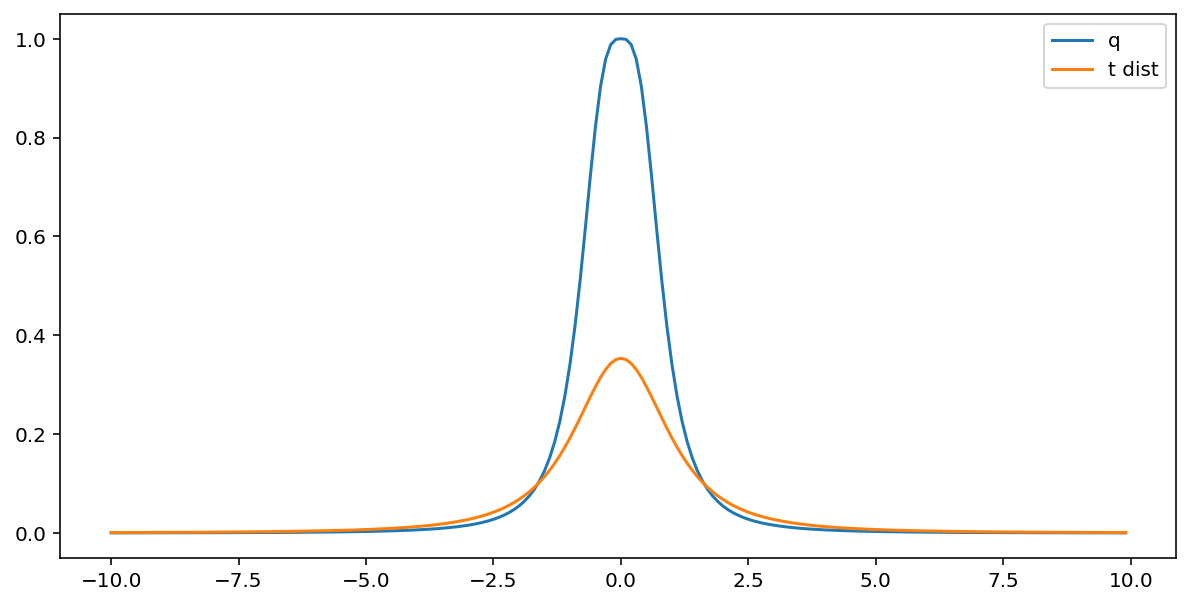

In [137]:
x_axis = np.arange(-10, 10, 0.1)

output = q_ij(x_axis)

fig, ax = plt.subplots(figsize=(10,5))

plt.plot(x_axis, output)
plt.plot(x_axis, scipy.stats.distributions.t.pdf(x_axis, 2))
plt.legend(['q', 't dist'])

In practice, UMAP finds $a$ and $b$ from non-linear least-square fittign to the piecewise function with the `min_dist` hyperparameter:

$$\big( 1 + a(y_i - y_j)^{2b} \big) ^{-1} \approx
\left\{
                \begin{array}{ll}
                  1 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{if } y_i - y_j \leq min_idst \\
                  e^{-(y_i - y_j) - min\_dist} \;\;\;\;\; \text{if } y_i - y_j > min_idst \\
                \end{array}
              \right.
  $$

/Users/nathanieldake/.virtualenvs/intuitiveml-venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


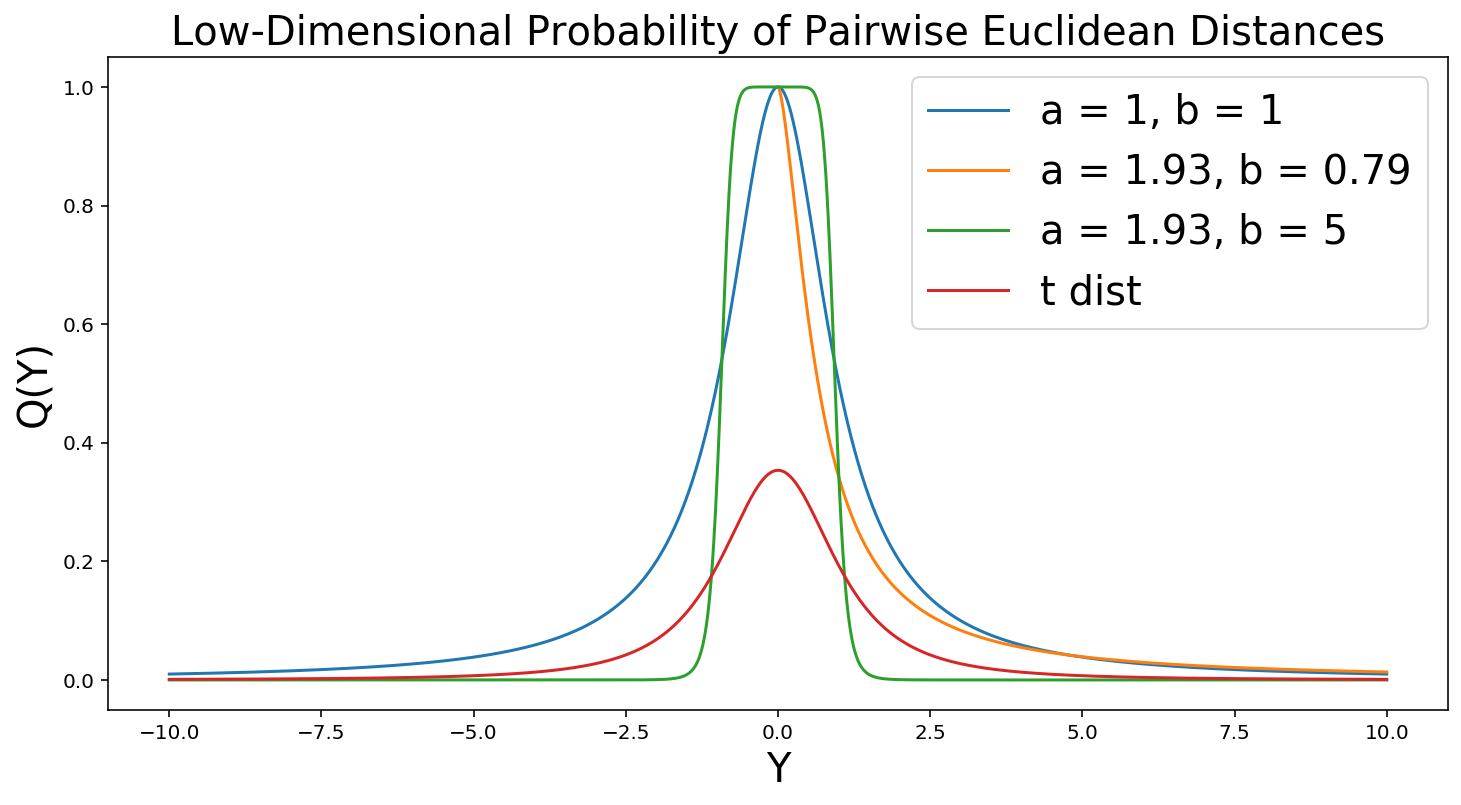

In [149]:
plt.figure(figsize=(12, 6))
y = np.linspace(-10, 10, 2000)

my_prob = lambda y, a, b: np.power(1 + a*y**(2*b), -1)

plt.plot(y, my_prob(y, a = 1, b = 1))
plt.plot(y, my_prob(y, a = 1.93, b = 0.79))
plt.plot(y, my_prob(y, a = 1.93, b = 5))
plt.plot(y, scipy.stats.distributions.t.pdf(y, 2))

plt.gca().legend(('a = 1, b = 1', 'a = 1.93, b = 0.79', 'a = 1.93, b = 5', 't dist'), fontsize = 20)
plt.title("Low-Dimensional Probability of Pairwise Euclidean Distances", fontsize = 20)
plt.xlabel("Y", fontsize = 20)
plt.ylabel("Q(Y)", fontsize = 20)
plt.show()

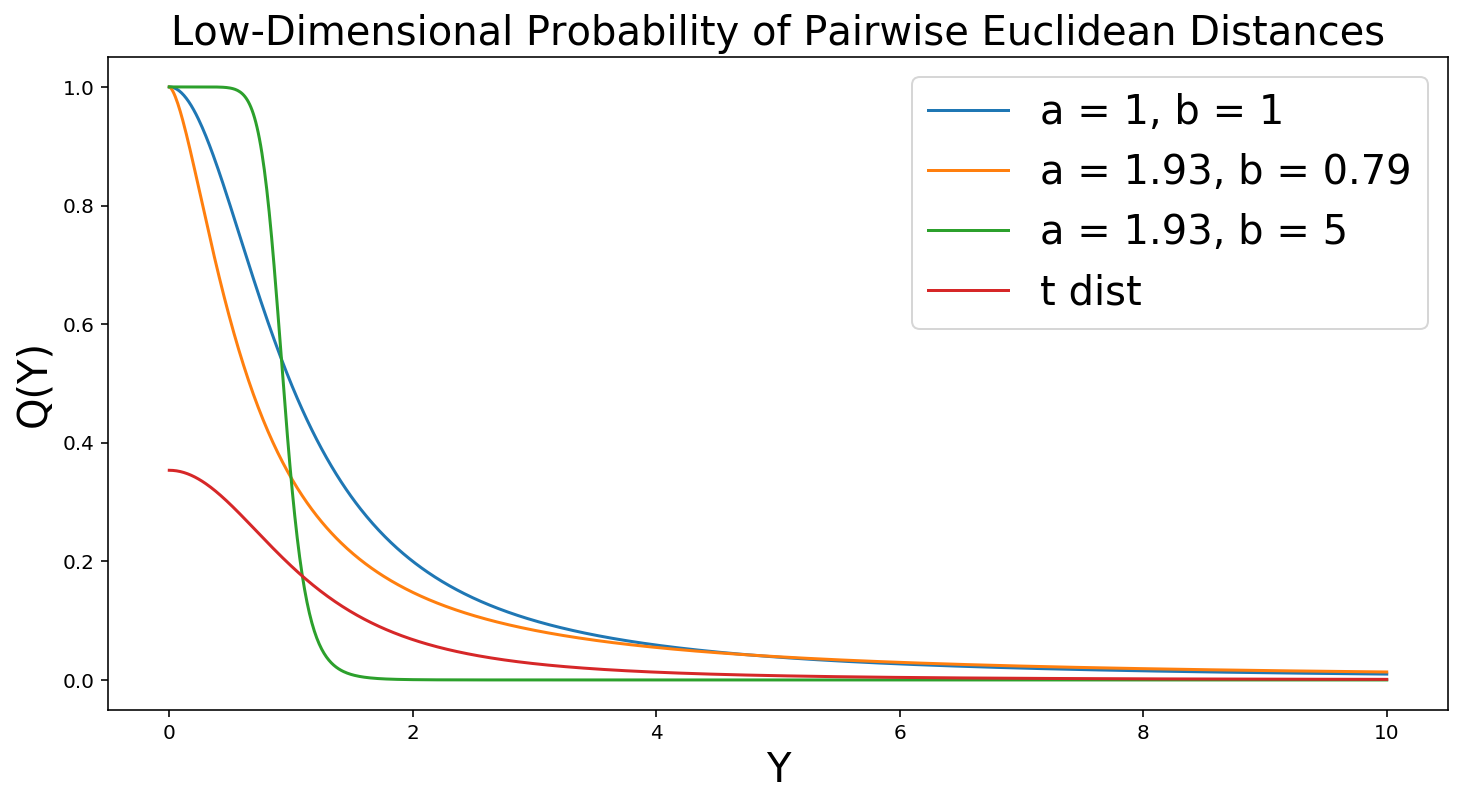

In [150]:
plt.figure(figsize=(12, 6))
y = np.linspace(0, 10, 1000)

my_prob = lambda y, a, b: np.power(1 + a*y**(2*b), -1)
plt.plot(y, my_prob(y, a = 1, b = 1))
plt.plot(y, my_prob(y, a = 1.93, b = 0.79))
plt.plot(y, my_prob(y, a = 1.93, b = 5))
plt.plot(y, scipy.stats.distributions.t.pdf(y, 2))

plt.gca().legend(('a = 1, b = 1', 'a = 1.93, b = 0.79', 'a = 1.93, b = 5', 't dist'), fontsize = 20)
plt.title("Low-Dimensional Probability of Pairwise Euclidean Distances", fontsize = 20)
plt.xlabel("Y", fontsize = 20)
plt.ylabel("Q(Y)", fontsize = 20)
plt.show()

In [118]:
MIN_DIST = 0.25

x = np.linspace(0, 3, 300)

def f(x, min_dist):
    y = []
    for i in range(len(x)):
        if(x[i] <= min_dist):
            y.append(1)
        else:
            y.append(np.exp(- x[i] + min_dist))
    return y

dist_low_dim = lambda x, a, b: 1 / (1 + a*x**(2*b))

p , _ = scipy.optimize.curve_fit(dist_low_dim, x, f(x, MIN_DIST))

a = p[0]
b = p[1] 
print("Hyperparameters a = " + str(a) + " and b = " + str(b))

Hyperparameters a = 1.1214363422489875 and b = 1.0574998767490977


# NOTE: 
umap does actually normalize! It simply normalizes for the $k$ nearest neighbors of a specific point, but subtracting the distance $\rho$ and then dividing by the variance, $sigma$! 

# Appendix
### A1. Kernel Functions and Kernel Density Estimation
For more information check out video [here](https://www.youtube.com/watch?v=x5zLaWT5KPs). A kernel function could be weighting function, or the form of a PDF in which any factors that are not functions of the variable are ommitted:

$$\text{Gaussian PDF} \longrightarrow p(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{ - \frac{(x - \mu)^2}{2 \sigma^2}}$$

$$\text{Gaussian Kernel} \longrightarrow p(x \mid \mu, \sigma^2) \propto e^{ - \frac{(x - \mu)^2}{2 \sigma^2}}$$

Example above taken from [wikipedia](https://en.wikipedia.org/wiki/Kernel_(statistics)). Kernels are generally chosen as follows:

<img src="https://intuitive-ml-images.s3-us-west-1.amazonaws.com/machine_learning/unsupervised/umap/KDE_kernel_selection.png" width="500">

## A2. Questions Remaining
* How exactly is $\sigma_i$ a normalizer is the high dimensional probability matrix?